In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [57]:
aapl = pd.read_csv('AAPL.csv', index_col="date", skiprows=[1])
goog = pd.read_csv('GOOG.csv', index_col="date", skiprows=[1])
amzn = pd.read_csv('AMZN.csv', index_col="date", skiprows=[1])
msft = pd.read_csv('MSFT.csv', index_col="date", skiprows=[1])

In [58]:
aapl.head()

,close,volume,open,high,low
date,,,,,
2019/08/23,202.64,46882840.0,209.43,212.0510,201.0000
2019/08/22,212.46,22267820.0,213.19,214.4350,210.7500
2019/08/21,212.64,21564750.0,212.99,213.6500,211.6032
2019/08/20,210.36,26919530.0,210.88,213.3500,210.3200
2019/08/19,210.35,24431920.0,210.62,212.7307,210.0250


In [59]:
amzn.sort_values(by=["date"], ascending=True, inplace=True)

In [60]:
def nasdaq_forcast(*args):
    for dataset in args:      
        dataset.sort_values(by=["date"], ascending=True, inplace=True)

In [61]:
nasdaq_forcast(goog, aapl, msft, amzn)

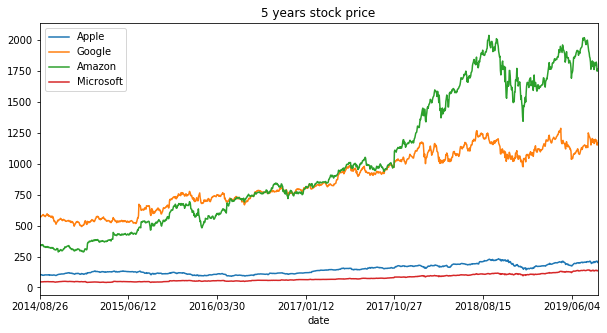

In [62]:
aapl["close"].plot(figsize=(10,5), label="Apple", title="5 years stock price")
goog["close"].plot(label="Google")
amzn["close"].plot(label="Amazon")
msft["close"].plot(label="Microsoft")
plt.legend()

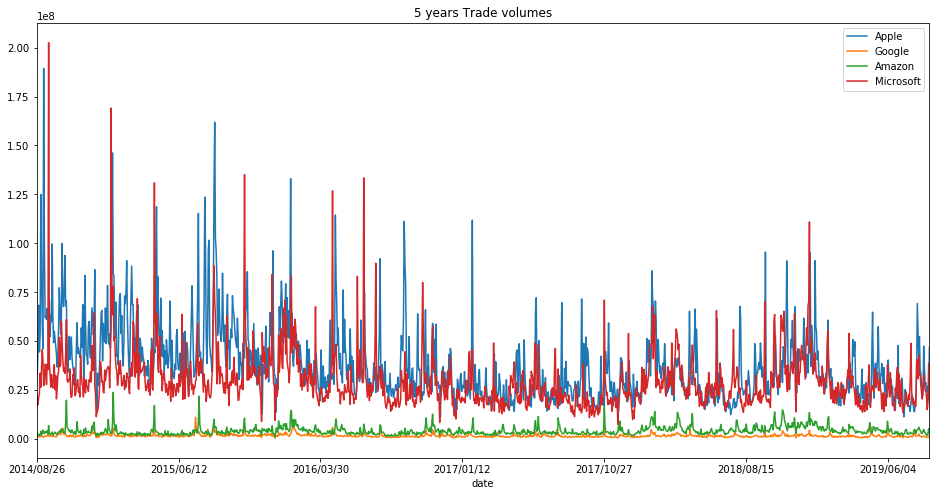

In [63]:
aapl["volume"].plot(figsize=(16,8), label="Apple", title="5 years Trade volumes")
goog["volume"].plot(label="Google")
amzn["volume"].plot(label="Amazon")
msft["volume"].plot(label="Microsoft")
plt.legend()

In [64]:
msft["volume"].argmax()

'2014/09/19'

In [65]:
msft["volume"].argmin()

'2017/11/24'

In [66]:
goog["volume"].argmax()

'2015/07/17'

In [67]:
aapl.head()

,close,volume,open,high,low
date,,,,,
2014/08/25,101.540,40087220.0,101.79,102.17,101.28
2014/08/26,100.889,33079170.0,101.42,101.50,100.86
2014/08/27,102.130,46807000.0,101.02,102.57,100.70
2014/08/28,102.250,68368740.0,101.59,102.78,101.56
2014/08/29,102.500,44516120.0,102.86,102.90,102.20


# Total Trade amount

In [68]:
aapl["Total Trade"] = aapl["close"]*aapl["volume"]
goog["Total Trade"] = goog["close"]*goog["volume"]
msft["Total Trade"] = msft["close"]*msft["volume"]
amzn["Total Trade"] = amzn["close"]*amzn["volume"]

In [69]:
amzn.head()

,close,volume,open,high,low,Total Trade
date,,,,,,
2014/08/26,341.83,3635270.0,337.00,344.3600,334.5500,1.242644e+09
2014/08/27,343.18,2961440.0,342.09,346.6700,341.3400,1.016307e+09
2014/08/28,340.02,2252212.0,340.00,341.7900,338.8000,7.657971e+08
2014/08/29,339.04,1935571.0,341.76,341.8199,337.6800,6.562360e+08
2014/09/02,342.38,2325098.0,339.98,342.5000,337.1587,7.960671e+08


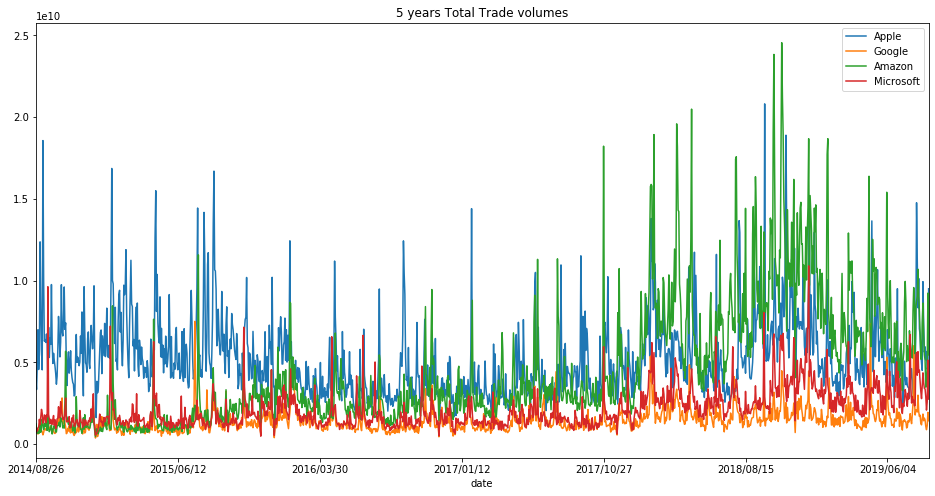

In [70]:
aapl["Total Trade"].plot(figsize=(16,8), label="Apple", title="5 years Total Trade volumes")
goog["Total Trade"].plot(label="Google")
amzn["Total Trade"].plot(label="Amazon")
msft["Total Trade"].plot(label="Microsoft")
plt.legend()

In [71]:
msft["Total Trade"].argmax()

'2018/12/21'

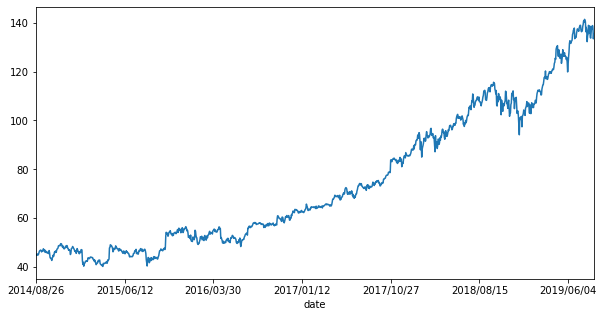

In [72]:
msft["close"].plot(figsize=(10,5))

In [73]:
msft["MA50"] = msft["close"].rolling(50).mean()
msft["MA200"] = msft["close"].rolling(200).mean()

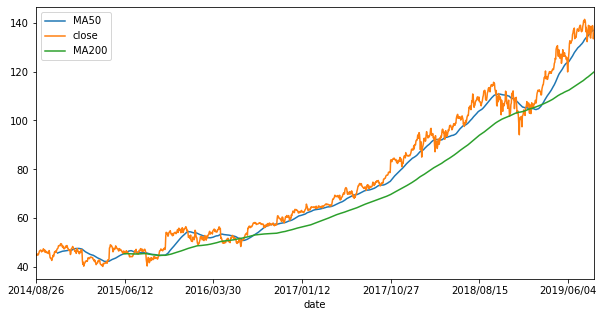

In [74]:
msft[["MA50","close", "MA200"]].plot(figsize=(10,5))

- Calculate the MA50 and MA200 for all stocks . 
- Plot the line chart for all of them .  
- Refactor all the code into functions  


In [75]:
def moving_average_chart(dataset, title, column):
    dataset["MA50"] = dataset[column].rolling(50).mean()
    dataset["MA200"] = dataset[column].rolling(200).mean()
    dataset[["MA50",column, "MA200"]].plot(figsize=(10,5), title=title)

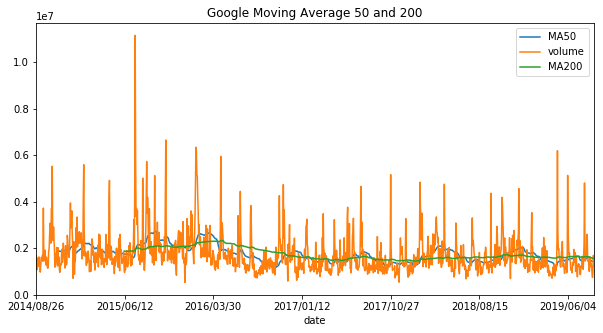

In [76]:
moving_average_chart(goog, "Google Moving Average 50 and 200", "volume")

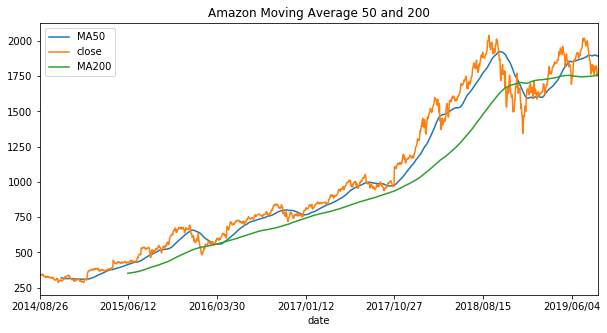

In [77]:
moving_average_chart(amzn, "Amazon Moving Average 50 and 200", "close")

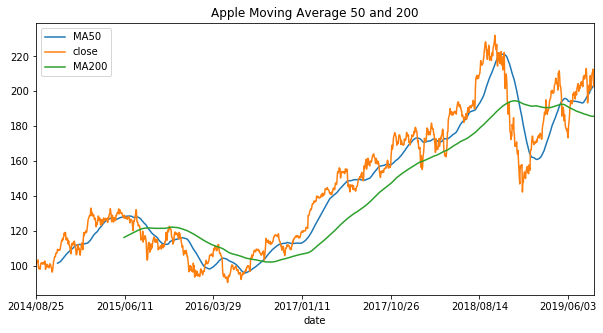

In [78]:
moving_average_chart(aapl, "Apple Moving Average 50 and 200", "close")

In [79]:
from pandas.plotting import scatter_matrix

In [80]:
all_companies = pd.concat([
    aapl["close"],
    amzn["close"],
    msft["close"],
    goog["close"]
], axis=1)

In [81]:
all_companies.columns = ["Apple", "Amazon", "Microsoft", "Google"]
all_companies.head()

,Apple,Amazon,Microsoft,Google
2014/08/25,101.540,NaN,NaN,NaN
2014/08/26,100.889,341.83,45.005,577.86
2014/08/27,102.130,343.18,44.870,571.00
2014/08/28,102.250,340.02,44.880,569.20
2014/08/29,102.500,339.04,45.430,571.60


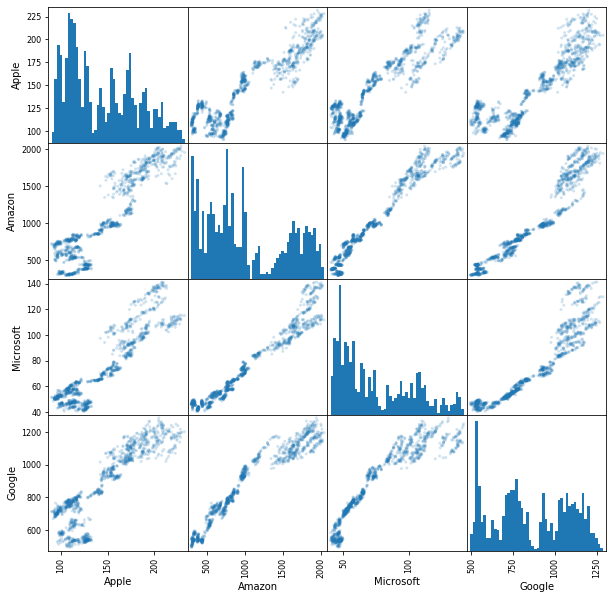

In [82]:
scatter_matrix(
    all_companies, 
    figsize=(10,10), 
    alpha=0.2, 
    hist_kwds={'bins': 50}
)
plt.show()

# Daily percentage change

# $r_t = \frac{p_t}{p_{t-1}} - 1$

In [83]:
def cal_daily_return(*args):
    for dataset in args:
        dataset["daily_return"] = (dataset["close"]/dataset["close"].shift(1))-1        

In [84]:
cal_daily_return(goog, amzn, msft, aapl)

In [85]:
goog.head(1)

,close,volume,open,high,low,Total Trade,MA50,MA200,daily_return
date,,,,,,,,,
2014/08/26,577.86,1634286.0,581.26,581.8,576.58,9.443885e+08,NaN,NaN,NaN


In [86]:
aapl.head(2)

,close,volume,open,high,low,Total Trade,MA50,MA200,daily_return
date,,,,,,,,,
2014/08/25,101.540,40087220.0,101.79,102.17,101.28,4.070456e+09,NaN,NaN,NaN
2014/08/26,100.889,33079170.0,101.42,101.50,100.86,3.337324e+09,NaN,NaN,-0.006411


## Histogram

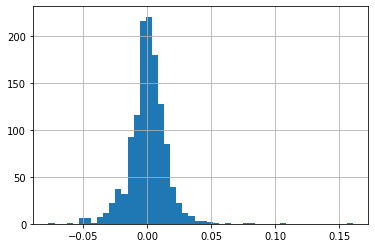

In [87]:
goog["daily_return"].hist(bins=50)

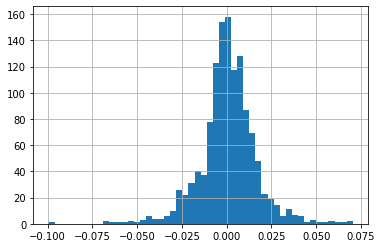

In [88]:
aapl["daily_return"].hist(bins=50)

In [89]:
def plot_histogram(labels, *args):
    concat_list = []
    for dataset in args:
        concat_list.append(dataset["daily_return"])
    
    merged_df = pd.concat(concat_list, axis=1)
    merged_df.columns = labels
    for col in merged_df.columns:
        merged_df[col].hist(bins=50, label=col, figsize=(10,6))
    plt.legend()
    return merged_df

In [90]:
# SOLUTION 2: Better one
def plot_histogram2(labels, *args):
    index = -1
    for dataset in args:
        index += 1 #increment by 1
        dataset["daily_return"].hist(bins=50, label=labels[index])
    plt.legend()

In [91]:
# SOLUTION 3: Event Better one
def plot_histogram3(labels,*args ):
    for dataset in args:
        dataset["daily_return"].hist(bins=50, figsize=(10,6), alpha=0.5)
    plt.legend(labels)

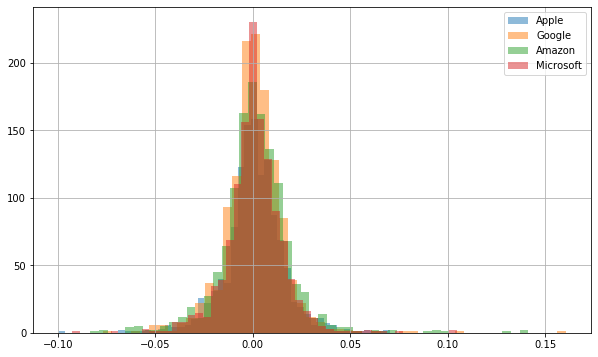

In [92]:
#SOLUTION 4: using **kwargs

def plot_hist(**kwargs):
    for key , value in kwargs.items():
        value["daily_return"].hist( bins=50, figsize=(10,6), alpha=0.5 )
    plt.legend(kwargs.keys())
        
kwargs = {"Apple":aapl, "Google":goog, "Amazon":amzn, "Microsoft":msft}
plot_hist(**kwargs)
    

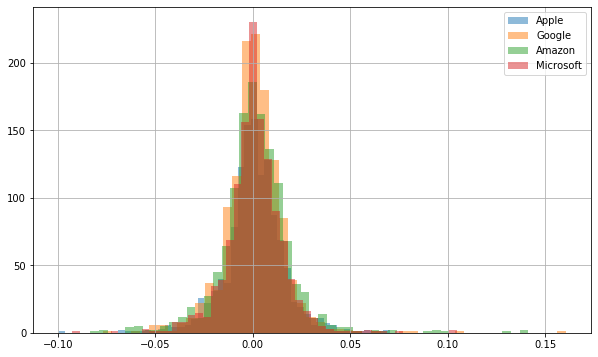

In [93]:
plot_histogram3(
    ["Apple", "Google", "Amazon", "Microsoft"],
    aapl, 
    goog, 
    amzn, 
    msft
)

In [94]:
# KDE
def plot_kde(labels, *args):
    index = -1
    for dataset in args:
        index += 1 #increment by 1
        dataset["daily_return"].plot(kind="kde", label=labels[index], figsize=(10,6))
    plt.legend()

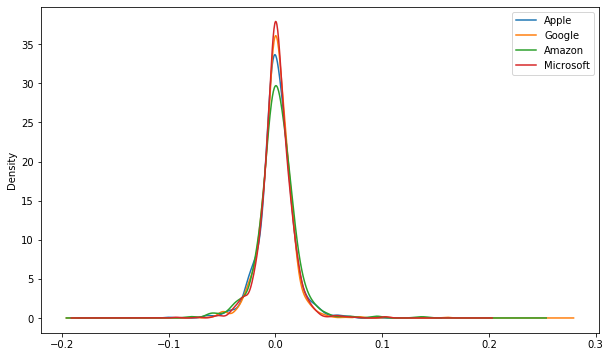

In [95]:
plot_kde(
    ["Apple", "Google", "Amazon", "Microsoft"],
    aapl, 
    goog, 
    amzn, 
    msft
)

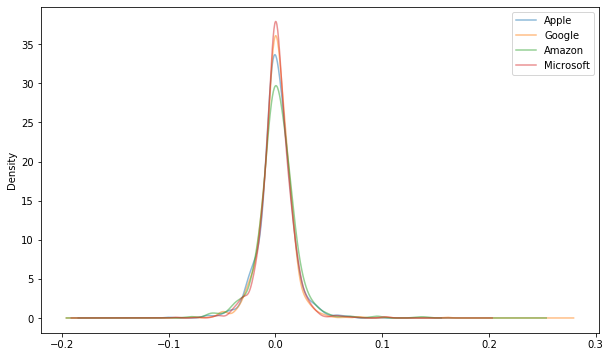

In [96]:
#KDE using **kwargs

def plot_kde(**kwargs):
    for key , value in kwargs.items():
        value["daily_return"].plot( kind = "kde", figsize=(10,6), alpha=0.5 )
    plt.legend(kwargs.keys())
        
kwargs = {"Apple":aapl, "Google":goog, "Amazon":amzn, "Microsoft":msft}
plot_kde(**kwargs)




In [97]:
box_df = pd.concat([
    aapl['daily_return'],
    goog['daily_return'],
    msft['daily_return'],
    amzn['daily_return']
], axis=1)
box_df.columns = ["Apple", "Google", "Microsoft", "Amazon"]

In [98]:
box_df.head()

,Apple,Google,Microsoft,Amazon
2014/08/25,NaN,NaN,NaN,NaN
2014/08/26,-0.006411,NaN,NaN,NaN
2014/08/27,0.012301,-0.011871,-0.003000,0.003949
2014/08/28,0.001175,-0.003152,0.000223,-0.009208
2014/08/29,0.002445,0.004216,0.012255,-0.002882


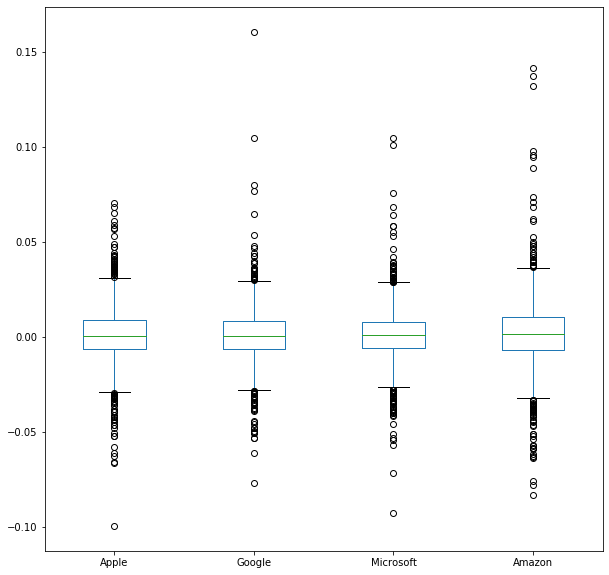

In [99]:
box_df.plot(kind="box", figsize=(10,10))

- Calculate cumulative Returns . 
- Plot a line chart shows all of the accumulative returns  


In [100]:
#code for testing the reduce...function
from itertools import accumulate
from operator import add
from functools import reduce
a =[4,6,12]
reduce(lambda c, x: c + [c[-1] + x], a, [0])[1:]
#accumulate (a, add)

[4, 10, 22]

In [101]:
#testing for cumsum
from numpy import cumsum
a =[4,6,12]
cumsum(a)

array([ 4, 10, 22], dtype=int32)

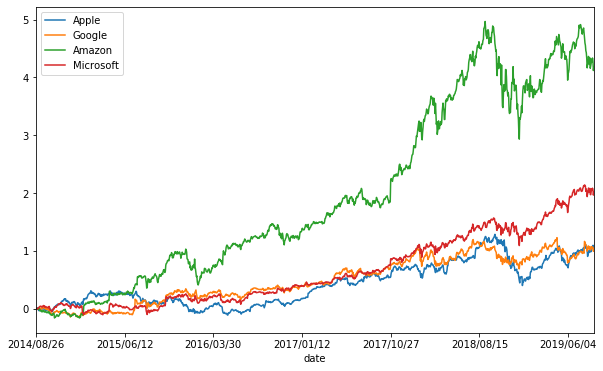

In [102]:
# "summation" of daily returns
#
# reduce function is used


from functools import reduce


def cumul_return_1(**kwargs):
    for key, value in kwargs.items():  
        value["cumul_return"] = reduce(lambda c,x: c + [(1.+ c[-1])*(1.+ x) -1.], list(value["daily_return"].fillna(0)), [0])[1:]
        value["cumul_return"].plot(figsize=(10,6))
    plt.legend(kwargs.keys())
        
kwargs = {"Apple":aapl, "Google":goog, "Amazon":amzn, "Microsoft":msft}
cumul_return_1(**kwargs)
       

Cumulative return (using cumul_return_1)

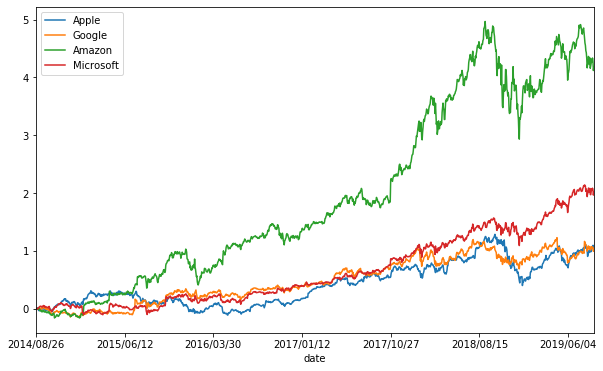

In [103]:
#   "summation" of daily returns
#
# reduce function is used
# reduce argument function is named and defined as separate function: red_use



from functools import reduce

def red_use(c,x):
    return c + [(1.+c[-1])*(1.+x)-1.]


    
def cumul_return_2(**kwargs):
    for key, value in kwargs.items():
        init = list(value["daily_return"].fillna(0))
        value["cumul_return"] = reduce(red_use, init , [0])[1:]
        value["cumul_return"].plot(figsize=(10,6))
    plt.legend(kwargs.keys())
        
kwargs = {"Apple":aapl, "Google":goog, "Amazon":amzn, "Microsoft":msft}
cumul_return_2(**kwargs)

Cumulative return (using cumul_return_2)

In [104]:
aapl.head()

,close,volume,open,high,low,Total Trade,MA50,MA200,daily_return,cumul_return
date,,,,,,,,,,
2014/08/25,101.540,40087220.0,101.79,102.17,101.28,4.070456e+09,NaN,NaN,NaN,0.000000
2014/08/26,100.889,33079170.0,101.42,101.50,100.86,3.337324e+09,NaN,NaN,-0.006411,-0.006411
2014/08/27,102.130,46807000.0,101.02,102.57,100.70,4.780399e+09,NaN,NaN,0.012301,0.005811
2014/08/28,102.250,68368740.0,101.59,102.78,101.56,6.990704e+09,NaN,NaN,0.001175,0.006992
2014/08/29,102.500,44516120.0,102.86,102.90,102.20,4.562902e+09,NaN,NaN,0.002445,0.009454


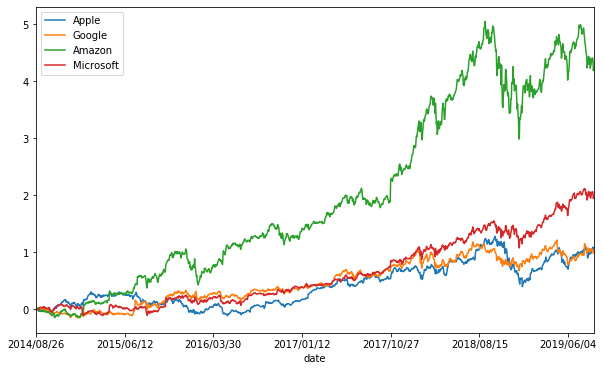

In [105]:
# calculation using the formula = cumul_return = (finalPrice - initPrice)/finalPrice
# initPrice is choosen to be open Price at the first day, finalPrice is chooosen to be close Price at final day

# map function is used


def cumul_return_3(**kwargs):
    
    for key, value in kwargs.items():
        result = list(map(lambda x:(x-value["open"][0])/value["open"][0], list(value["close"])))
        value["cumul_return"] = result
        value["cumul_return"].plot(figsize=(10,6))
        plt.legend(kwargs.keys())
        
kwargs = {"Apple":aapl, "Google":goog, "Amazon":amzn, "Microsoft":msft}
cumul_return_3(**kwargs)



Cumulative return (using cumul_returm_3)

In [106]:
aapl.head()

,close,volume,open,high,low,Total Trade,MA50,MA200,daily_return,cumul_return
date,,,,,,,,,,
2014/08/25,101.540,40087220.0,101.79,102.17,101.28,4.070456e+09,NaN,NaN,NaN,-0.002456
2014/08/26,100.889,33079170.0,101.42,101.50,100.86,3.337324e+09,NaN,NaN,-0.006411,-0.008852
2014/08/27,102.130,46807000.0,101.02,102.57,100.70,4.780399e+09,NaN,NaN,0.012301,0.003340
2014/08/28,102.250,68368740.0,101.59,102.78,101.56,6.990704e+09,NaN,NaN,0.001175,0.004519
2014/08/29,102.500,44516120.0,102.86,102.90,102.20,4.562902e+09,NaN,NaN,0.002445,0.006975
